In [1]:
!ls './Reports/gender/b5post_pt'

ls: cannot access './Reports/gender/b5post_pt': No such file or directory


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)

def train_val_metrics(histories):
    print('Training: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'loss'), get_avg(histories, 'acc')))
    print('Validation: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'val_loss'), get_avg(histories, 'val_acc')))

In [3]:
import matplotlib.pyplot as plt
def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


1


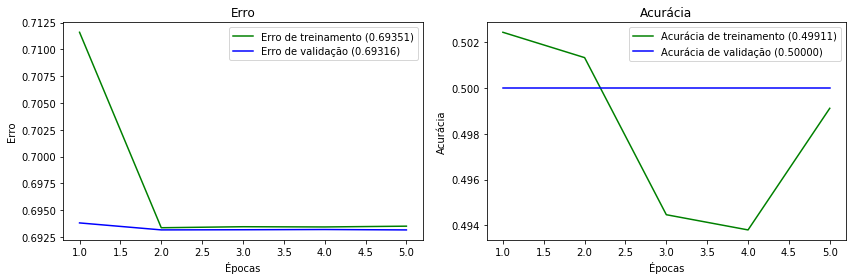

Training: 	0.6935 loss / 0.4991 acc
Validation: 	0.6932 loss / 0.5000 acc


In [20]:
with open('./Reports_grid/gender/pan13_en/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    print(len(histories))
    plot_history(histories[0])
    #plot_history(histories[1])
    train_val_metrics(histories)
    #plot_history(histories[2])

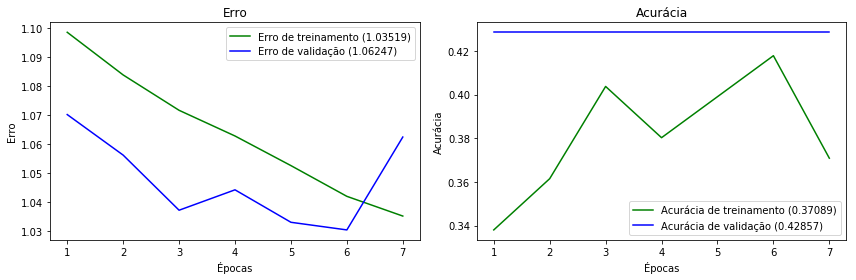

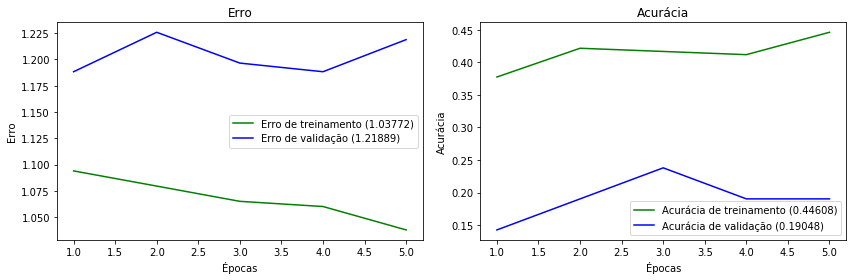

IndexError: index 2 is out of bounds for axis 0 with size 2

In [5]:
with open('./Reports/age/b5post_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [ ]:
with open('./Reports/gender/pan13_en/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [ ]:
np.zeros(100)

In [ ]:
from Models.functions.datasets import loadTrainTest

In [ ]:
!ls ./Grid

In [24]:
#pan13__grid.csv
import pandas as pd
import ast
def getReports(dataset_name, sort=False, task=None):
    params_keys = ['dropout_rate', 'embedding_dim', 'max_seq_length', 'strides', 'features_maps', 'epochs', 'batch_size', 'max_num_words', 'kernel_size']
    def split_params(x, key):
        x = ast.literal_eval(x)
        return x[key]

    rp = pd.read_csv('./Grid/'+dataset_name+'__grid.csv')
    
    for p in params_keys:    
        rp[p] = rp['params'].apply( split_params, key=p)
    rp = rp.drop(['params'],axis=1)

    rp = rp.filter(['dataset','task','lang','f1','loss','val_loss', 'kernel_size','features_maps','embedding_dim','dropout_rate','strides','max_num_words','max_seq_length','batch_size','tunning'])
    if task != None:
        rp = rp[(rp['task'] == task)]        
    if sort == True:
        rp = rp.sort_values(['f1'])
    return rp

### PAN AUTHOR PROFILING TASK RESULTS
#### Gender: 0.59 / Age: 0.64

In [25]:
!ls './Grid/pan13__grid.csv'

./Grid/pan13__grid.csv


In [26]:
getReports('pan13', sort=True, task='gender')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
5,pan13,gender,en,0.333333,0.695599,0.693120,"[7, 8, 9]","[50, 50, 50]",100,0.2,[1],10000,404.0,2,test channels
3,pan13,gender,en,0.333333,0.696534,0.690688,"[3, 4, 5]","[50, 50, 50]",100,0.2,[1],10000,411.0,2,test channels
2,pan13,gender,en,0.333333,0.693517,0.693161,"[3, 4, 5]","[10, 10, 10]",100,0.2,[1],10000,405.0,2,test channels
1,pan13,gender,en,0.333333,0.693890,0.693151,"[7, 8]","[50, 50]",100,0.2,[1],10000,412.0,2,test channels
9,pan13,gender,en,0.333333,0.693372,0.693150,"[7, 8]","[10, 10]",100,0.2,[1],10000,200.0,2,test channels
15,pan13,gender,en,0.458513,0.695970,0.688796,"[7, 8]","[50, 50]",100,0.2,[1],10000,200.0,2,test channels
13,pan13,gender,en,0.505204,0.695849,0.693970,"[7, 8]","[50, 50]",100,0.2,[1],1000,200.0,2,test channels
17,pan13,gender,en,0.507661,0.694685,0.684922,"[7, 8]","[50, 50]",100,0.2,[1],105421,200.0,2,test channels
11,pan13,gender,en,0.509470,0.691336,0.691297,"[7, 8]","[10, 10]",100,0.2,[1],104548,200.0,2,test channels
4,pan13,gender,en,0.515005,0.694807,0.690842,"[7, 8, 9]","[10, 10, 10]",100,0.2,[1],10000,423.0,2,test channels


In [27]:
getReports('pan13', sort=True, task='age')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
44,pan13,age,en,0.598565,0.886127,0.836361,"[3, 4, 5]","[10, 10, 10]",100,0.2,[1],69322,200.0,2,test channels
71,pan13,age,en,0.598685,0.906345,0.848450,[3],[50],100,0.2,[1],1000,411.0,2,test channels
47,pan13,age,en,0.600926,0.892262,0.910143,"[3, 4, 5]","[50, 50, 50]",100,0.2,[1],1000,412.0,2,test channels
73,pan13,age,en,0.601167,0.872222,0.843927,[3],[50],100,0.2,[1],10000,418.0,2,test channels
48,pan13,age,en,0.602978,0.865463,0.828639,"[3, 4, 5]","[50, 50, 50]",100,0.2,[1],10000,200.0,2,test channels
103,pan13,age,en,0.610357,0.836835,0.799793,"[2, 3]","[50, 50]",100,0.2,[1],10000,415.0,2,test channels
114,pan13,age,en,0.617788,0.850759,0.879600,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],10000,200.0,2,test channels
113,pan13,age,en,0.618505,0.842402,0.850216,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],1000,409.0,2,test channels
118,pan13,age,en,0.627492,0.707284,0.724197,"[3, 4]","[10, 10]",100,0.2,[1],10000,NaN,2,lstm alstm attention
119,pan13,age,en,0.661634,0.755226,0.720119,"[3, 4]","[10, 10]",100,0.2,[1],10000,NaN,2,lstm alstm attention


### BRMORAL Baseline1 results
#### Gender: 0.628 / Age: 0.404 / Religion: 0.406 / Education: 0.402 / TI: 0.63 / Politics: 0.49

In [98]:
getReports('brmoral', sort=True, task='gender')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
49,brmoral,gender,pt,0.456485,[3],[45],100,NaN,[1],500,302,32,NaN
27,brmoral,gender,pt,0.483852,[1],[40],100,NaN,[1],10,302,32,NaN
12,brmoral,gender,pt,0.503336,[2],[10],100,NaN,[1],6365,10,32,NaN
20,brmoral,gender,pt,0.511989,[1],[10],100,NaN,[1],500,50,32,NaN
38,brmoral,gender,pt,0.512592,[1],[80],100,NaN,[1],10,50,32,NaN
54,brmoral,gender,pt,0.513161,"[7, 8]","[60, 60]",100,NaN,[1],500,302,32,NaN
17,brmoral,gender,pt,0.516512,[1],[10],100,NaN,[1],100,50,32,NaN
43,brmoral,gender,pt,0.519928,[1],[80],100,NaN,[1],500,10,32,NaN
25,brmoral,gender,pt,0.524259,[1],[40],100,NaN,[1],10,10,32,NaN
24,brmoral,gender,pt,0.525746,[1],[10],100,NaN,[1],6447,302,32,NaN


In [4]:
getReports('brmoral', sort=True, task='age')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
1,brmoral,age,pt,0.258686,[3],[10],100,0.25,[1],6664,302,30,NaN
7,brmoral,age,pt,0.332422,[3],[10],100,0.25,[1],6697,302,30,NaN
108,brmoral,age,pt,0.370310,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,test2 embeddings
103,brmoral,age,pt,0.378859,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,embedding_dim
99,brmoral,age,pt,0.387701,"[7, 8]","[50, 50]",10,0.20,[1],500,302,8,embedding_dim
100,brmoral,age,pt,0.405822,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,embedding_dim
101,brmoral,age,pt,0.407934,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,embedding_dim
102,brmoral,age,pt,0.412616,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,embedding_dim


In [100]:
getReports('brmoral', sort=True, task='religion')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
116,brmoral,religion,pt,0.223403,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,create_cnn
114,brmoral,religion,pt,0.284571,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,create_cnn
115,brmoral,religion,pt,0.308832,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,create_cnn
2,brmoral,religion,pt,0.312733,[3],[10],100,0.25,[1],6664,302,30,NaN
8,brmoral,religion,pt,0.334201,[3],[10],100,0.25,[1],6697,302,30,NaN
109,brmoral,religion,pt,0.340353,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,test2 embeddings
111,brmoral,religion,pt,0.342576,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,test2 embeddings
110,brmoral,religion,pt,0.345938,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,test2 embeddings
113,brmoral,religion,pt,0.348166,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,create_cnn
112,brmoral,religion,pt,0.375490,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,test2 embeddings


In [7]:
getReports('brmoral', sort=True, task='it')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
10,brmoral,it,pt,0.550296,[3],[10],100,0.25,[1],6697,302,30,NaN
4,brmoral,it,pt,0.555139,[3],[10],100,0.25,[1],6664,302,30,NaN
121,brmoral,it,pt,0.577395,"[7, 8]","[50, 50]",50,0.20,[1],500,302,8,nilc
124,brmoral,it,pt,0.589168,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,nilc
122,brmoral,it,pt,0.612554,"[7, 8]","[50, 50]",50,0.20,[1],500,302,8,nilc
117,brmoral,it,pt,0.618266,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,create_cnn
120,brmoral,it,pt,0.632790,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,create_cnn
123,brmoral,it,pt,0.638848,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,nilc
119,brmoral,it,pt,0.642855,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,create_cnn
118,brmoral,it,pt,0.673774,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,create_cnn


In [6]:
getReports('brmoral', sort=True, task='education')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
9,brmoral,education,pt,0.262219,[3],[10],100,0.25,[1],6697,302,30,NaN
3,brmoral,education,pt,0.344252,[3],[10],100,0.25,[1],6664,302,30,NaN


In [12]:
getReports('brmoral', sort=True, task='politics')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
11,brmoral,politics,pt,0.287269,[3],[10],100,0.25,[1],6697,302,30,NaN
5,brmoral,politics,pt,0.301516,[3],[10],100,0.25,[1],6664,302,30,NaN


### enblogs RESULTS
#### gender: 0.75 / age: 0.72

In [33]:
getReports('enblog', sort=True, task='gender')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
35,enblog,gender,en,0.699457,0.586573,0.601456,[3],[10],100,0.2,[1],1000,1000,4,NaN
41,enblog,gender,en,0.700575,0.544167,0.617725,[3],[10],100,0.2,[1],30000,200,4,NaN
46,enblog,gender,en,0.710772,0.567544,0.613673,"[3, 3]","[10, 10]",100,0.2,[1],1000,3906,4,NaN
63,enblog,gender,en,0.711722,0.596248,0.608967,[8],[10],100,0.2,[1],10000,3906,4,test channels
42,enblog,gender,en,0.712795,0.577322,0.632582,[3],[10],100,0.2,[1],30000,500,4,NaN
64,enblog,gender,en,0.715212,0.592798,0.636496,[8],[50],100,0.2,[1],10000,3906,4,test channels
39,enblog,gender,en,0.715373,0.567603,0.595078,[3],[10],100,0.2,[1],10000,1000,4,NaN
47,enblog,gender,en,0.719113,0.702937,0.596921,"[3, 3]","[10, 10]",300,0.2,[1],1000,1000,4,embedding downloaded
40,enblog,gender,en,0.720872,0.687490,0.584803,[3],[10],100,0.2,[1],10000,3906,4,NaN
45,enblog,gender,en,0.721580,0.588780,0.552338,"[3, 3]","[10, 10]",100,0.2,[1],1000,1000,4,NaN


In [32]:
getReports('enblog', sort=True, task='age')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
101,enblog,age,en,0.660585,0.726924,1.024152,"[7, 8, 9]","[50, 50, 50]",100,0.2,[1],10000,4098,2,test channels
75,enblog,age,en,0.668662,0.804062,0.721626,[8],[10],100,0.2,[1],10000,3906,4,test channels
99,enblog,age,en,0.687676,1.597428,1.052963,"[3, 4, 5]","[50, 50, 50]",100,0.2,[1],10000,3679,2,test channels
103,enblog,age,en,0.689090,0.755024,0.840468,[3],[50],100,0.2,[1],10000,4124,2,test channels
73,enblog,age,en,0.691053,0.710209,0.687929,[3],[10],100,0.2,[1],10000,3906,4,test channels
76,enblog,age,en,0.694118,0.809988,0.888682,[8],[50],100,0.2,[1],10000,3906,4,test channels
79,enblog,age,en,0.705655,0.781800,0.830243,"[7, 8]","[10, 10]",100,0.2,[1],10000,3906,4,test channels
77,enblog,age,en,0.714268,0.739922,0.738682,"[3, 4]","[10, 10]",100,0.2,[1],10000,3906,4,test channels
74,enblog,age,en,0.723733,0.680849,0.908708,[3],[50],100,0.2,[1],10000,3906,4,test channels
78,enblog,age,en,0.728454,0.634157,0.718872,"[3, 4]","[50, 50]",100,0.2,[1],10000,3906,4,test channels


### e-Sic RESULTS

In [6]:
getReports('esic', sort=True)

FileNotFoundError: File b'./Grid/esic__grid.csv' does not exist

In [31]:
getReports('smscorpus', sort=True, task='gender')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
177,smscorpus,gender,en,0.644721,0.636785,0.640233,"[2, 3]","[50, 50]",100,0.2,[1],10000,50,2,fulldata
33,smscorpus,gender,en,0.645072,0.631658,0.660297,"[2, 3]","[50, 50]",100,0.2,[1],10000,50,2,test channels
58,smscorpus,gender,en,0.646103,0.658050,0.640943,"[2, 3]","[50, 50]",100,0.2,[1],4332,100,2,test channels
111,smscorpus,gender,en,0.646322,0.658531,0.662182,[3],[10],100,0.2,[1],10000,50,2,test channels
92,smscorpus,gender,en,0.647284,0.630351,0.641637,"[3, 4, 5]","[50, 50, 50]",100,0.2,[1],10000,100,2,test channels
105,smscorpus,gender,en,0.647285,0.634215,0.649835,"[7, 8, 9]","[50, 50, 50]",100,0.2,[1],10000,50,2,test channels
129,smscorpus,gender,en,0.649970,0.635985,0.643665,[8],[50],100,0.2,[1],10000,50,2,test channels
77,smscorpus,gender,en,0.651242,0.612268,0.646604,"[7, 8]","[10, 10]",100,0.2,[1],4379,50,2,test channels
53,smscorpus,gender,en,0.652193,0.634811,0.665229,"[2, 3]","[10, 10]",100,0.2,[1],4502,50,2,test channels
89,smscorpus,gender,en,0.655474,0.630732,0.647252,"[3, 4, 5]","[10, 10, 10]",100,0.2,[1],4309,50,2,test channels


In [30]:
getReports('smscorpus', sort=True, task='age')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
19,smscorpus,age,en,0.348812,0.971412,0.925079,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],1000,50,2,test channels
10,smscorpus,age,en,0.403141,0.992772,0.953710,"[2, 3]","[50, 50]",100,0.2,[1],4323,200,2,test channels
23,smscorpus,age,en,0.421493,1.030701,0.956282,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],4386,50,2,test channels
15,smscorpus,age,en,0.443649,0.964753,0.914020,"[2, 3, 4]","[10, 10, 10]",100,0.2,[1],10000,50,2,test channels
12,smscorpus,age,en,0.444498,0.973235,0.987889,"[2, 3, 4]","[10, 10, 10]",100,0.2,[1],1000,200,2,test channels
22,smscorpus,age,en,0.444899,0.952598,1.035583,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],4306,200,2,test channels
6,smscorpus,age,en,0.447809,0.881178,1.016459,"[2, 3]","[50, 50]",100,0.2,[1],1000,200,2,test channels
13,smscorpus,age,en,0.477225,0.910854,0.964932,"[2, 3, 4]","[10, 10, 10]",100,0.2,[1],1000,50,2,test channels
18,smscorpus,age,en,0.488862,0.986791,0.951409,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],1000,200,2,test channels
5,smscorpus,age,en,0.524103,0.978348,0.876987,"[2, 3]","[10, 10]",100,0.2,[1],4171,50,2,test channels
